<a href="https://colab.research.google.com/github/choidaesig/big_data_certificate/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98_%ED%9A%8C%EA%B7%80ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#지도학습 - 분류

## 의사결정나무

In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
df.info()
df.nunique()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ag=df.Age.mean()
df.Age.fillna(ag,inplace=True)
ebk = df.Embarked.mode()[0]
df.Embarked.fillna(ebk,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df.Sex=LabelEncoder().fit_transform(df.Sex)
df.Embarked = LabelEncoder().fit_transform(df.Embarked)

In [ ]:
df['family'] = df.SibSp + df.Parch

In [ ]:
X = df[['Pclass','Sex','Age','Fare','Embarked','family']]
y=df.Survived

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=11, test_size=0.3)

dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
pred=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc  = accuracy_score(Y_test,pred)
print(acc)

0.7798507462686567


## 로지스틱

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [ ]:
#df.info()
#df.isna().sum()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.sepal_length = scaler.fit_transform(df[['sepal_length']])
df.sepal_width = scaler.fit_transform(df[['sepal_width']])
df.petal_length = scaler.fit_transform(df[['petal_length']])
df.petal_width = scaler.fit_transform(df[['petal_width']])

In [ ]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
Y=df['species']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=11)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,pred)
print(acc)

0.8444444444444444


## 랜덤 포레스트

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=20)

In [ ]:
pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,pred)
acc

0.835820895522388

# 지도학습 - 회귀

 ## 단순 선형 회귀

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [9]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model-year       13
dtype: int64

In [11]:
avg=df['horsepower'].mean()
df.horsepower.fillna(avg,inplace=True)

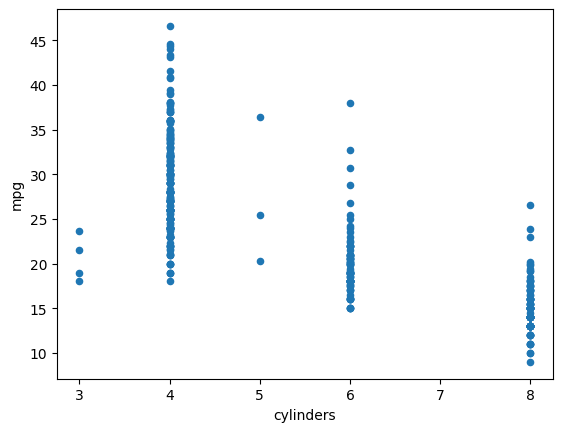

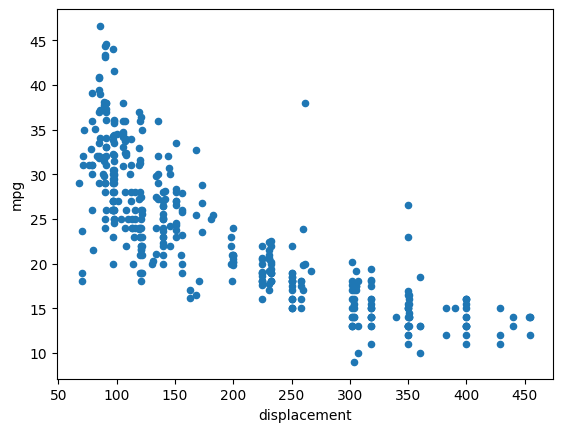

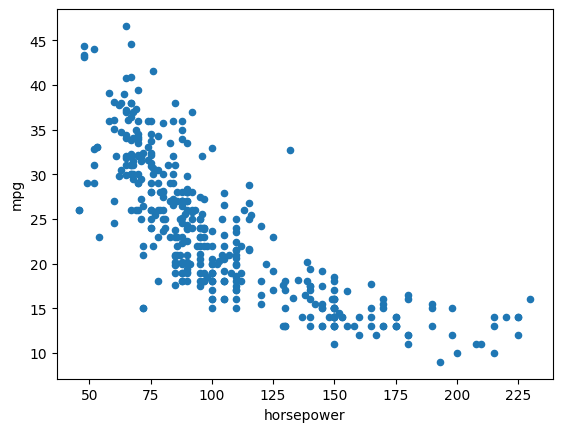

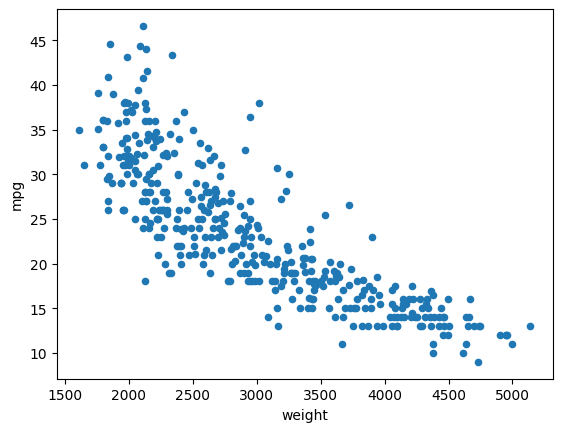

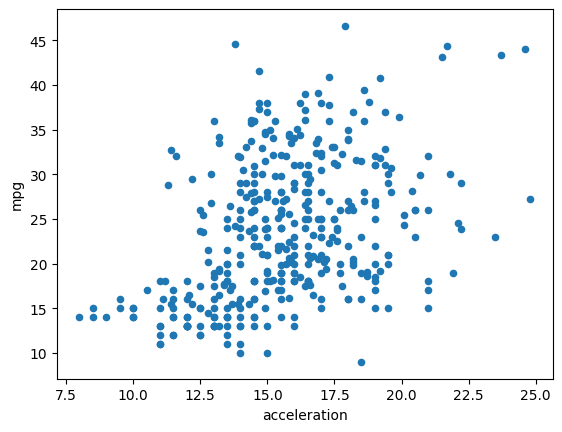

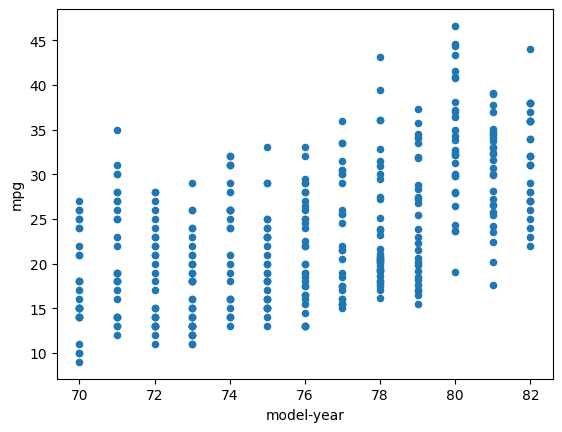

In [13]:
df.plot(kind='scatter',x='cylinders',y='mpg')
plt.show()

df.plot(kind='scatter',x='displacement',y='mpg')
plt.show()

df.plot(kind='scatter',x='horsepower',y='mpg')
plt.show()

df.plot(kind='scatter',x='weight',y='mpg')
plt.show()

df.plot(kind='scatter',x='acceleration',y='mpg')
plt.show()

df.plot(kind='scatter',x='model-year',y='mpg')
plt.show()

In [19]:
X=df[['weight']]
Y=df[['mpg']]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,Y_train)

LinearRegression()

In [25]:
lr.coef_, lr.intercept_

(array([[-0.00784408]]), array([46.93728507]))

In [26]:
pred= lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, pred)
print(score)

0.7243152426344307


## 랜덤포레스트

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv("http://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [34]:
drop_col=['total_bedrooms','ocean_proximity']
df_drop=df.drop(columns=drop_col)

In [35]:
df_drop.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.857126,0.918484,0.198050,0.134153
population,0.099773,-0.108785,-0.296244,0.857126,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,-0.024650,0.065843,0.688075,1.000000


In [36]:
X=df_drop.drop('median_house_value',axis=1)
Y=df_drop.median_house_value

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

rf= RandomForestRegressor(max_depth=3, random_state=42)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [38]:
pred= rf.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,pred)
print(mse)

6444575208.906212
